In [60]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 10.0)
# plt.rcParams['suptitle.fontsize'] = (18)
import os
from textwrap import wrap
os.chdir("/home/nitin/hopkins/neurodata/orange-panda/notes/bad_chan_detect")
from mat_py.helper import *
# Fix random seed
initseed = 123456789
np.random.seed(initseed)

In [61]:
os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
test = np.load("test.npz")
print test.keys()
# print test[0]

['test_arr1', 'test_arr2']


In [3]:
os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
patient_num = "gp_A00054039001"
patient_np = np.load(patient_num + ".npz")
py_rej = patient_np['py_rej']
py_jp = patient_np['py_jp']
mat_rej = patient_np['mat_rej']
mat_jp = patient_np['mat_jp']

In [4]:
print py_rej.shape
print py_jp.shape
print mat_rej.shape
print mat_jp.shape

(1, 105, 4)
(105, 4)
(105, 4)
(105, 4)


In [5]:
print py_rej.any()
print mat_rej.any()

False
False


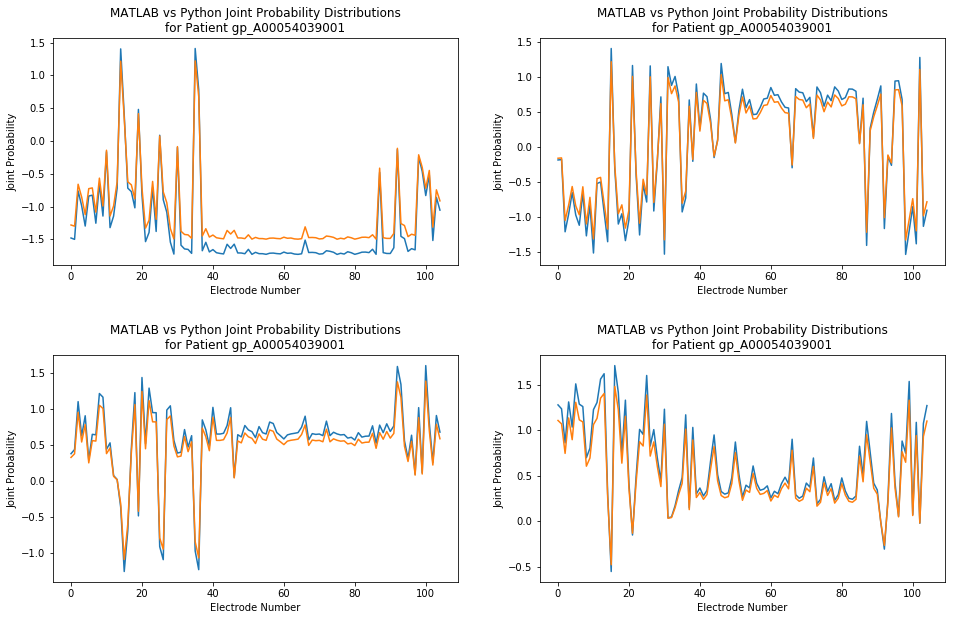

In [9]:
# plot the joint probs for different trials
fig = plt.figure()
for i in range(py_jp.shape[1]):
    ax = fig.add_subplot(2,2,i + 1)
    ax.plot(py_jp[:,i], label="Python")
    ax.plot(mat_jp[:,i], label="MATLAB")
    ax.set_title("\n".join(wrap("MATLAB vs Python Joint Probability Distributions for Patient " + patient_num, 50)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Joint Probability')
#     ax.legend(loc='upper right')
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()

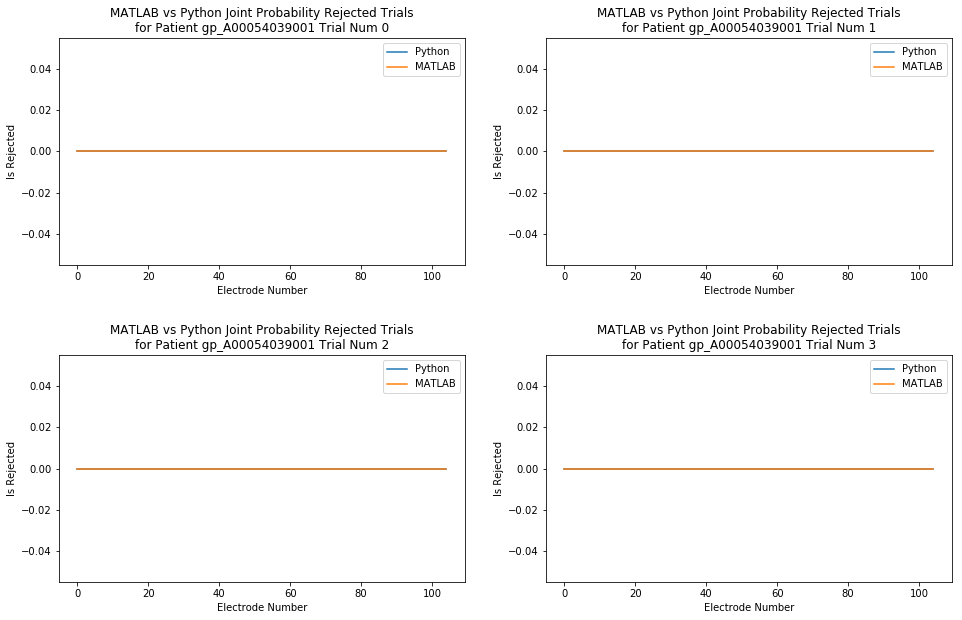

In [51]:
# plot the rejected electrodes for different trials
fig = plt.figure()
for i in range(py_rej.shape[2]):
    ax = fig.add_subplot(2,2,i + 1)
    ax.plot(py_rej[0,:,i], label="Python")
    ax.plot(mat_rej[:,i], label="MATLAB")
    ax.set_title("\n".join(wrap("MATLAB vs Python Joint Probability Rejected Trials for Patient " + patient_num + " Trial Num " + str(i), 50)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    ax.legend(loc='upper right')
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()

## Kurtosis Based Detection

In [11]:
os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
patient_num = "gp_A00054039001"
patient_kurt_np = np.load("gp_A00054039001_kurt.npz")
py_rej = patient_kurt_np['py_rej']
py_kurt = patient_kurt_np['py_kurt']
mat_rej = patient_kurt_np['mat_rej']
mat_kurt = patient_kurt_np['mat_kurt']

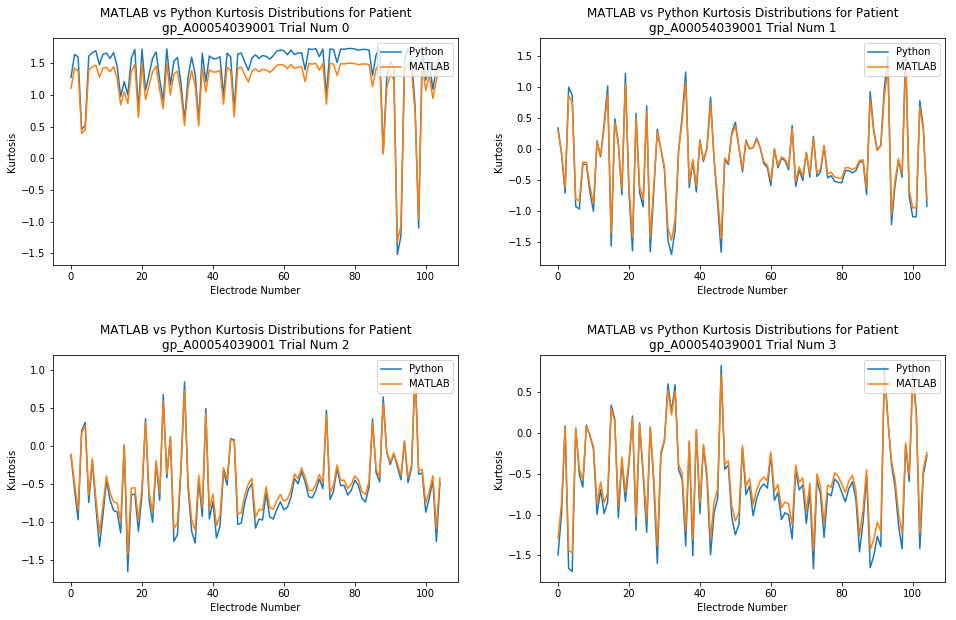

In [53]:
# plot the Kurtosis for different trials
fig = plt.figure(figsize=(16,10))
for i in range(py_kurt.shape[1]):
    ax = fig.add_subplot(2,2,i + 1)
    ax.plot(py_kurt[:,i], label="Python")
    ax.plot(mat_kurt[:,i], label="MATLAB")
    ax.set_title("\n".join(wrap("MATLAB vs Python Kurtosis Distributions for Patient " + patient_num + " Trial Num " + str(i), 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Kurtosis')
    ax.legend(loc='upper right')
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()

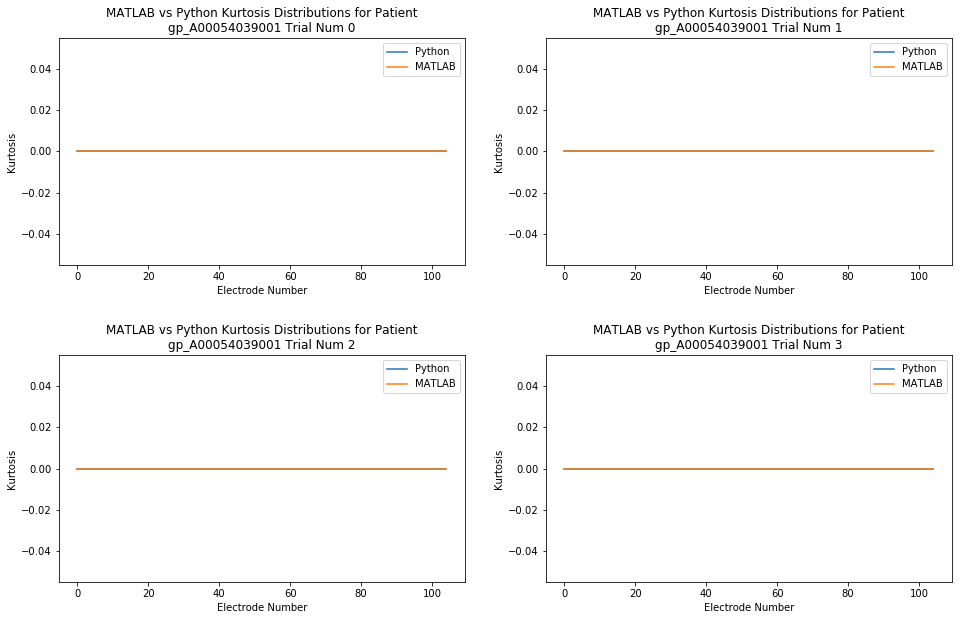

In [48]:
# we want to compare the different bad elecs. First let's show the bad elecs

# plot the rejected electrodes for different trials
fig = plt.figure(figsize=(16,10))
for i in range(py_rej.shape[2]):
    ax = fig.add_subplot(2,2,i + 1)
    ax.plot(py_rej[0,:,i], label="Python")
    ax.plot(mat_rej[:,i], label="MATLAB")
    ax.set_title("\n".join(wrap("MATLAB vs Python Kurtosis Distributions for Patient " + patient_num + " Trial Num " + str(i), 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Kurtosis')
    ax.legend(loc='upper right')
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()

In [14]:
py_glob_rej = patient_kurt_np['py_glob_rej']
py_glob_kurt = patient_kurt_np['py_glob_kurt']
mat_glob_rej = patient_kurt_np['mat_glob_rej']
mat_glob_kurt = patient_kurt_np['mat_glob_kurt']

In [15]:
print py_glob_rej.shape
print mat_glob_rej.shape
print py_glob_kurt.shape
print mat_glob_kurt.shape

(1, 105, 1)
(105, 1)
(105, 1)
(105, 1)


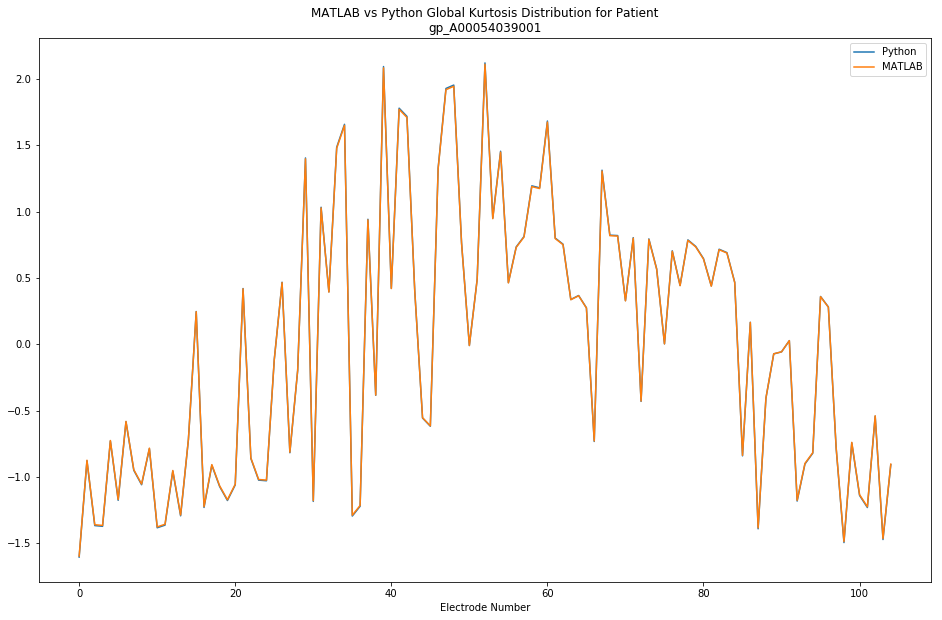

In [16]:
# plot the joint probs for different trials
plt.plot(py_glob_kurt, label="Python")
plt.plot(mat_glob_kurt, label="MATLAB")
plt.title("\n".join(wrap("MATLAB vs Python Global Kurtosis Distribution for Patient " + patient_num, 60)))
plt.xlabel("Electrode Number")
plt.legend(loc='upper right')
# fig.subplots_adjust(wspace=.5)
plt.show()

In [26]:
patient, time, auto_bad, man_bad, zero = list(get_patient(patient_num + ".mat")[i] for i in range(5))

In [104]:
nic_rej = np.zeros(111)
nic_rej[auto_bad] = 1
nic_rej = np.delete(nic_rej, zero, 0)
nic_man_rej = np.zeros(111)
nic_man_rej[man_bad] = 1
nic_man_rej = np.delete(nic_man_rej, zero, 0)

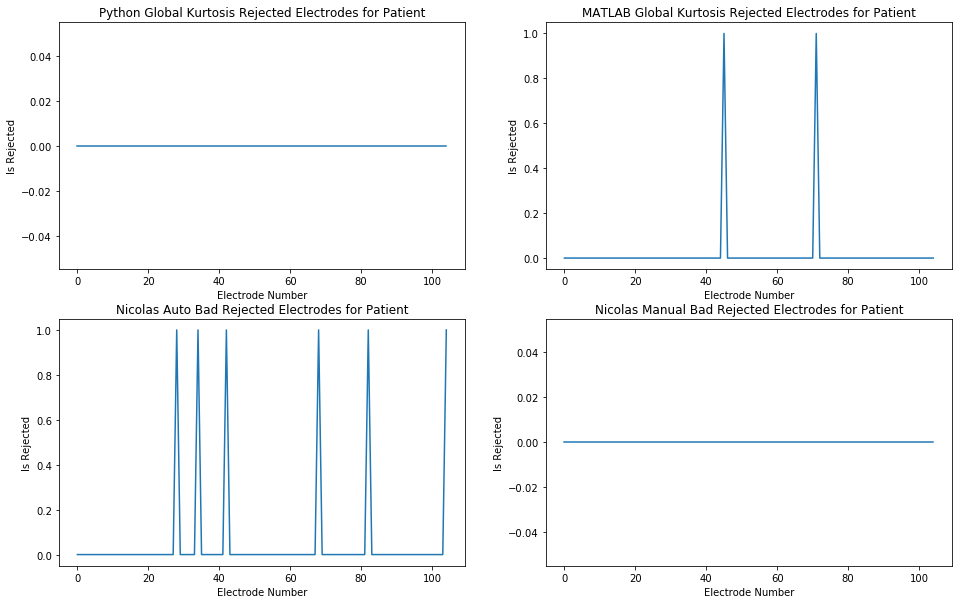

In [106]:
# we want to compare the different bad elecs. First let's show the bad elecs
# for i in range(py_jp.shape[1]):

fig = plt.figure(figsize=(16,10))
# First Python Rej
ax = fig.add_subplot(2,2,1)
ax.plot(py_glob_rej[0,:], label="Python")
ax.set_title("\n".join(wrap("Python Global Kurtosis Rejected Electrodes for Patient", 60)))
ax.set_xlabel('Electrode Number')
ax.set_ylabel('Is Rejected')
# First MATLAB Rej
ax = fig.add_subplot(2,2,2)
ax.plot(mat_glob_rej, label="Python")
ax.set_title("\n".join(wrap("MATLAB Global Kurtosis Rejected Electrodes for Patient", 60)))
ax.set_xlabel('Electrode Number')
ax.set_ylabel('Is Rejected')
# Nicolas Auto Rej
ax = fig.add_subplot(2,2,3)
ax.plot(nic_rej, label="Nicolas Auto Bad")
ax.set_title("\n".join(wrap("Nicolas Auto Bad Rejected Electrodes for Patient", 60)))
ax.set_xlabel('Electrode Number')
ax.set_ylabel('Is Rejected')
# Nicolas Manual Rej
ax = fig.add_subplot(2,2,4)
ax.plot(nic_man_rej, label="Nicolas Manual Bad")
ax.set_title("\n".join(wrap("Nicolas Manual Bad Rejected Electrodes for Patient", 60)))
ax.set_xlabel('Electrode Number')
ax.set_ylabel('Is Rejected')

plt.show()

In [118]:
print py_glob_rej[0,:].shape
print mat_glob_rej.shape
print nic_rej.shape
print nic_man_rej.shape
final_dat = np.column_stack((py_glob_rej[0,:], mat_glob_rej, nic_rej, nic_man_rej))
fig = plt.pcolor(final_dat.T, cmap='hot', interpolation='nearest', aspect='auto')
# fig.set_yticklabels(column_labels, minor=False)
plt.show()

(105,)
(105, 1)
(105,)
(105,)


AttributeError: Unknown property aspect

In [18]:
print np.where(py_glob_rej[0,:,:])[0]
print np.where(mat_glob_rej[:,:])[0]

[]
[]


In [19]:
patient, time, auto_bad, man_bad, zero = list(get_patient(patient_num + ".mat")[i] for i in range(5))

In [20]:
print zero

[0, 7, 13, 19, 23, 30]


In [21]:
print auto_bad
print man_bad

[34, 40, 48, 74, 88, 110]
[]


In [22]:
# Need a function to eliminate the zero electrodes the same 

## Put the 2 Together

In [73]:
os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
patient_jp_np = np.load(patient_names[0] + "_jp.npz")
py_rej = patient_jp_np['py_rej']
py_jp = patient_jp_np['py_jp']
mat_rej = patient_jp_np['mat_rej']
mat_jp = patient_jp_np['mat_jp']
py_glob_rej = patient_jp_np['py_glob_rej']
py_glob_jp = patient_jp_np['py_glob_jp']
mat_glob_rej = patient_jp_np['mat_glob_rej']
mat_glob_jp = patient_jp_np['mat_glob_jp']

In [74]:
print py_glob_rej.shape

(1, 105)


In [119]:
def plot_data(patient_num):
    
    ########## Get Original Patient Data
    
    patient, time, auto_bad, man_bad, zero = list(get_patient(patient_num + ".mat")[i] for i in range(5))
    nic_rej = np.zeros(111)
    nic_rej[auto_bad] = 1
    nic_rej = np.delete(nic_rej, zero, 0)
    nic_man_rej = np.zeros(111)
    nic_man_rej[man_bad] = 1
    nic_man_rej = np.delete(nic_man_rej, zero, 0)
    
    sup_size = 18
    
    ########## Joint Prob
    
    # grab the data
    os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
    patient_jp_np = np.load(patient_num + "_jp.npz")
    py_rej = patient_jp_np['py_rej']
    py_jp = patient_jp_np['py_jp']
    mat_rej = patient_jp_np['mat_rej']
    mat_jp = patient_jp_np['mat_jp']
    py_glob_rej = patient_jp_np['py_glob_rej']
    py_glob_jp = patient_jp_np['py_glob_jp']
    mat_glob_rej = patient_jp_np['mat_glob_rej']
    mat_glob_jp = patient_jp_np['mat_glob_jp']
    
    # plot the joint probs for different trials
    fig = plt.figure()
    for i in range(py_jp.shape[1]):
        ax = fig.add_subplot(2,2,i + 1)
        ax.plot(py_jp[:,i], label="Python")
        ax.plot(mat_jp[:,i], label="MATLAB")
        ax.set_title("\n".join(wrap("MATLAB vs Python Joint Probability Distributions for Patient " + patient_num, 50)))
        ax.set_xlabel('Electrode Number')
        ax.set_ylabel('Joint Probability')
    #     ax.legend(loc='upper right')
    fig.subplots_adjust(wspace=.2, hspace = .4)
    fig.suptitle('Joint Probability Distributions', fontsize = sup_size)
    plt.show()
    
    # plot the rejected electrodes for different trials
    fig = plt.figure()
    for i in range(py_rej.shape[2]):
        ax = fig.add_subplot(2,2,i + 1)
        ax.plot(py_rej[0,:,i], label="Python")
        ax.plot(mat_rej[:,i], label="MATLAB")
        ax.set_title("\n".join(wrap("MATLAB vs Python Joint Probability Rejected Trials for Patient " + patient_num + " Trial Num " + str(i), 50)))
        ax.set_xlabel('Electrode Number')
        ax.set_ylabel('Is Rejected')
        ax.legend(loc='upper right')
    fig.subplots_adjust(wspace=.2, hspace = .4)
    fig.suptitle('Joint Probability Rejected Electrodes', fontsize = sup_size)
    plt.show()
    
    # plot the global joint prob
    plt.plot(py_glob_jp, label="Python")
    plt.plot(mat_glob_jp, label="MATLAB")
    plt.title("\n".join(wrap("MATLAB vs Python Global Joint Probability Distribution for Patient " + patient_num, 60)), fontsize= sup_size)
    plt.xlabel("Electrode Number")
    plt.legend(loc='upper right')
    # fig.subplots_adjust(wspace=.5)
    plt.show()
    
    # we want to compare the global bad elecs
    fig = plt.figure(figsize=(16,10))
    # First Python Rej
    ax = fig.add_subplot(2,2,1)
    ax.plot(py_glob_rej[0,:], label="Python")
    ax.set_title("\n".join(wrap("Python Global Joint Probability Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # First MATLAB Rej
    ax = fig.add_subplot(2,2,2)
    ax.plot(mat_glob_rej, label="Python")
    ax.set_title("\n".join(wrap("MATLAB Global Joint Probability Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # Nicolas Auto Rej
    ax = fig.add_subplot(2,2,3)
    ax.plot(nic_rej, label="Nicolas Auto Bad")
    ax.set_title("\n".join(wrap("Nicolas Auto Bad Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # Nicolas Manual Rej
    ax = fig.add_subplot(2,2,4)
    ax.plot(nic_man_rej, label="Nicolas Manual Bad")
    ax.set_title("\n".join(wrap("Nicolas Manual Bad Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')

    fig.suptitle('Global Kurtosis Joint Probability Electrodes', fontsize = sup_size)
    plt.show()
    
    ########## Kurtosis
    
    patient_kurt_np = np.load(patient_num + "_kurt.npz")
    py_rej = patient_kurt_np['py_rej']
    py_kurt = patient_kurt_np['py_kurt']
    mat_rej = patient_kurt_np['mat_rej']
    mat_kurt = patient_kurt_np['mat_kurt']
    py_glob_rej = patient_kurt_np['py_glob_rej']
    py_glob_kurt = patient_kurt_np['py_glob_kurt']
    mat_glob_rej = patient_kurt_np['mat_glob_rej']
    mat_glob_kurt = patient_kurt_np['mat_glob_kurt']
    
    # plot the Kurtosis for different trials
    fig = plt.figure(figsize=(16,10))
    for i in range(py_kurt.shape[1]):
        ax = fig.add_subplot(2,2,i + 1)
        ax.plot(py_kurt[:,i], label="Python")
        ax.plot(mat_kurt[:,i], label="MATLAB")
        ax.set_title("\n".join(wrap("MATLAB vs Python Kurtosis Distributions for Patient " + patient_num + " Trial Num " + str(i), 60)))
        ax.set_xlabel('Electrode Number')
        ax.set_ylabel('Kurtosis')
        ax.legend(loc='upper right')
    fig.subplots_adjust(wspace=.2, hspace = .4)
    fig.suptitle('Kurtosis Distributions', fontsize = sup_size)
    plt.show()
    
    # we want to compare the different bad elecs. First let's show the bad elecs

    # plot the rejected electrodes for different trials
    fig = plt.figure(figsize=(16,10))
    for i in range(py_rej.shape[2]):
        ax = fig.add_subplot(2,2,i + 1)
        ax.plot(py_rej[0,:,i], label="Python")
        ax.plot(mat_rej[:,i], label="MATLAB")
        ax.set_title("\n".join(wrap("MATLAB vs Python Kurtosis Distributions for Patient " + patient_num + " Trial Num " + str(i), 60)))
        ax.set_xlabel('Electrode Number')
        ax.set_ylabel('Kurtosis')
        ax.legend(loc='upper right')
    fig.subplots_adjust(wspace=.2, hspace = .4)
    fig.suptitle('Kurtosis Rejected Electrodes', fontsize = sup_size)
    plt.show()
    
    # plot the global kurtosis
    plt.plot(py_glob_kurt, label="Python")
    plt.plot(mat_glob_kurt, label="MATLAB")
    plt.title("\n".join(wrap("MATLAB vs Python Global Kurtosis Distribution for Patient " + patient_num, 60)), fontsize= sup_size)
    plt.xlabel("Electrode Number")
    plt.legend(loc='upper right')
    # fig.subplots_adjust(wspace=.5)
    plt.show()
    
    # we want to compare the global bad elecs
    fig = plt.figure(figsize=(16,10))
    # First Python Rej
    ax = fig.add_subplot(2,2,1)
    ax.plot(py_glob_rej[0,:,:], label="Python")
    ax.set_title("\n".join(wrap("Python Global Kurtosis Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # First MATLAB Rej
    ax = fig.add_subplot(2,2,2)
    ax.plot(mat_glob_rej, label="Python")
    ax.set_title("\n".join(wrap("MATLAB Global Kurtosis Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # Nicolas Auto Rej
    ax = fig.add_subplot(2,2,3)
    ax.plot(nic_rej, label="Nicolas Auto Bad")
    ax.set_title("\n".join(wrap("Nicolas Auto Bad Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # Nicolas Manual Rej
    ax = fig.add_subplot(2,2,4)
    ax.plot(nic_man_rej, label="Nicolas Manual Bad")
    ax.set_title("\n".join(wrap("Nicolas Manual Bad Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')

    fig.suptitle('Global Kurtosis Rejected Electrodes', fontsize = sup_size)
    plt.show()

In [120]:
# List all patient names
patient_names = [
    "gp_A00051826001",
    "bip_A00053375001",
    "gip_A00051955001",
    "gip_A00053440001",
    "gip_A00054417001",
    "bip_A00054215001",
    "gip_A00054207001",
    "gp_A00054039001"
]

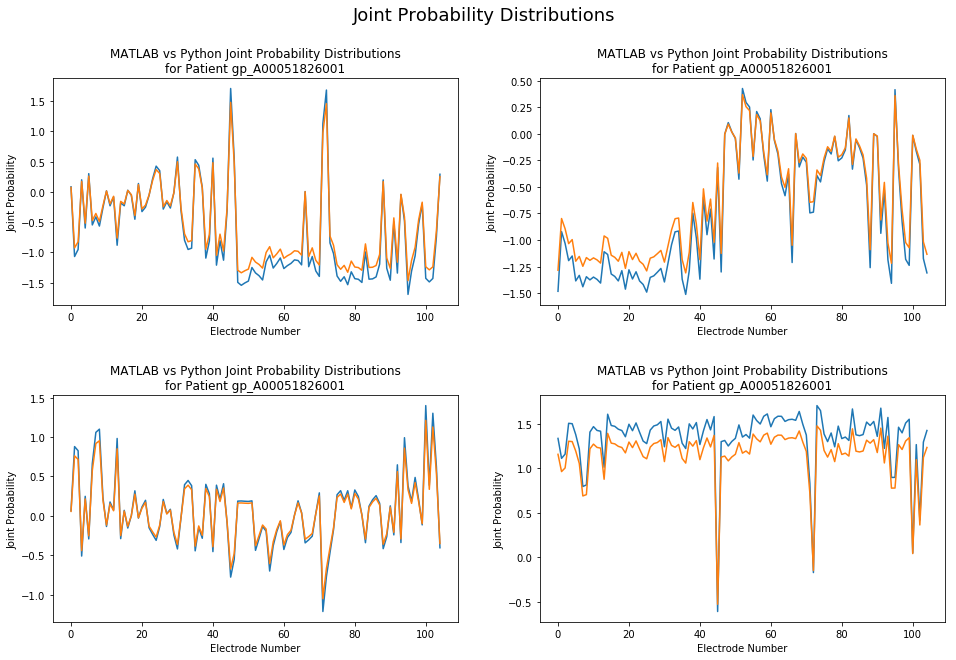

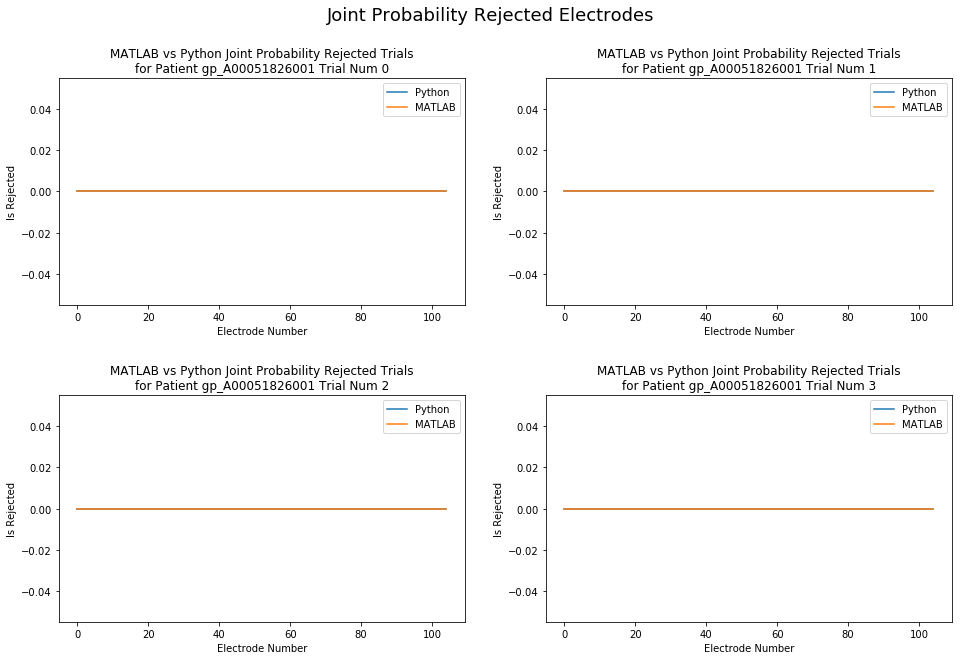

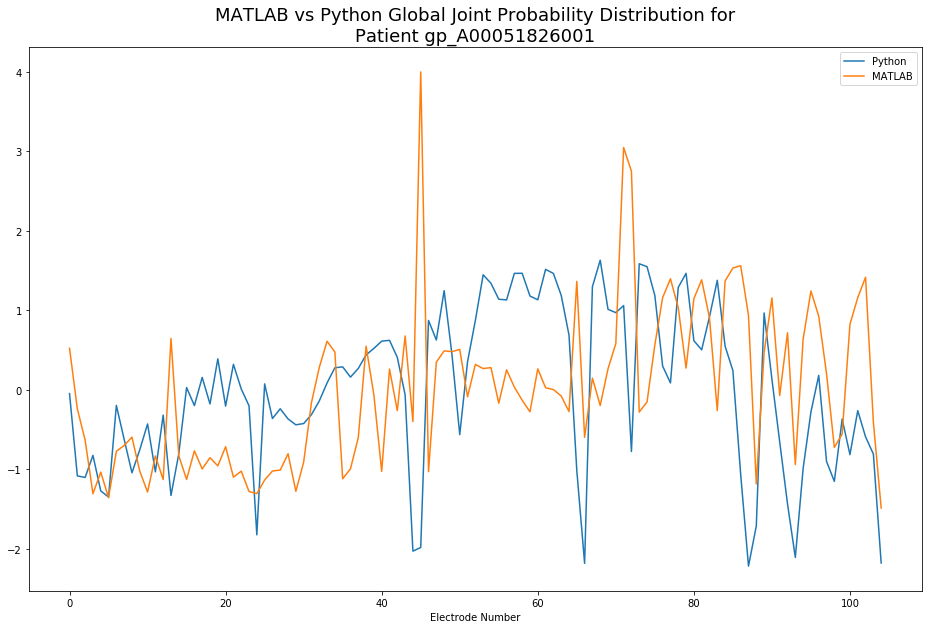

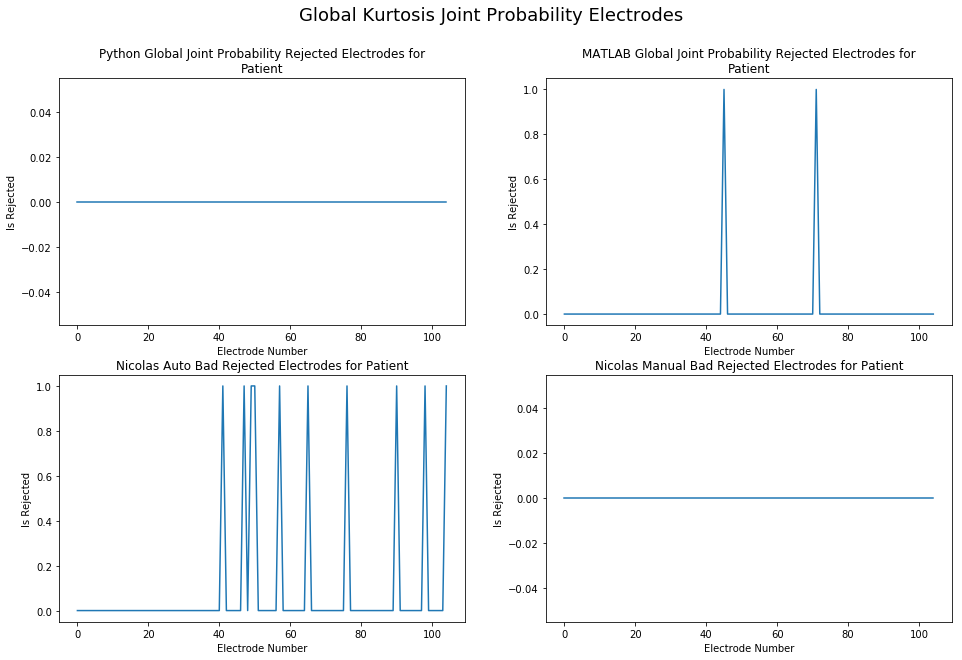

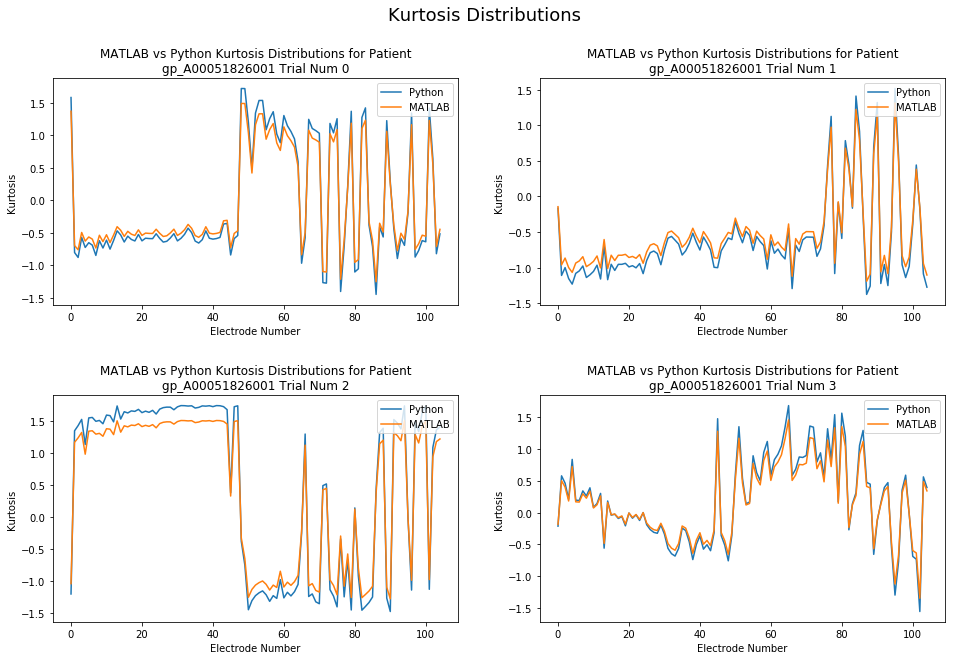

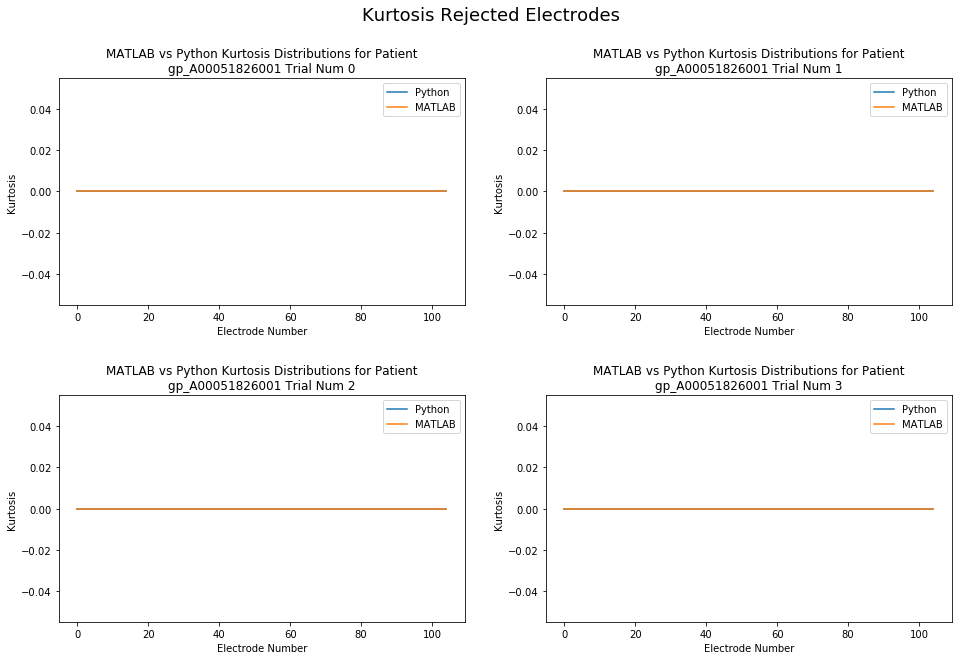

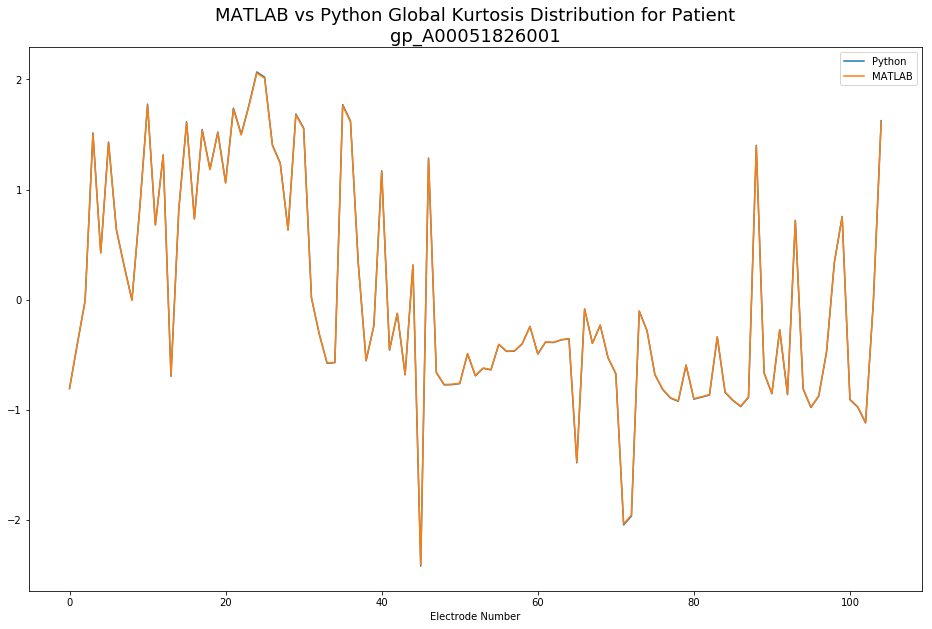

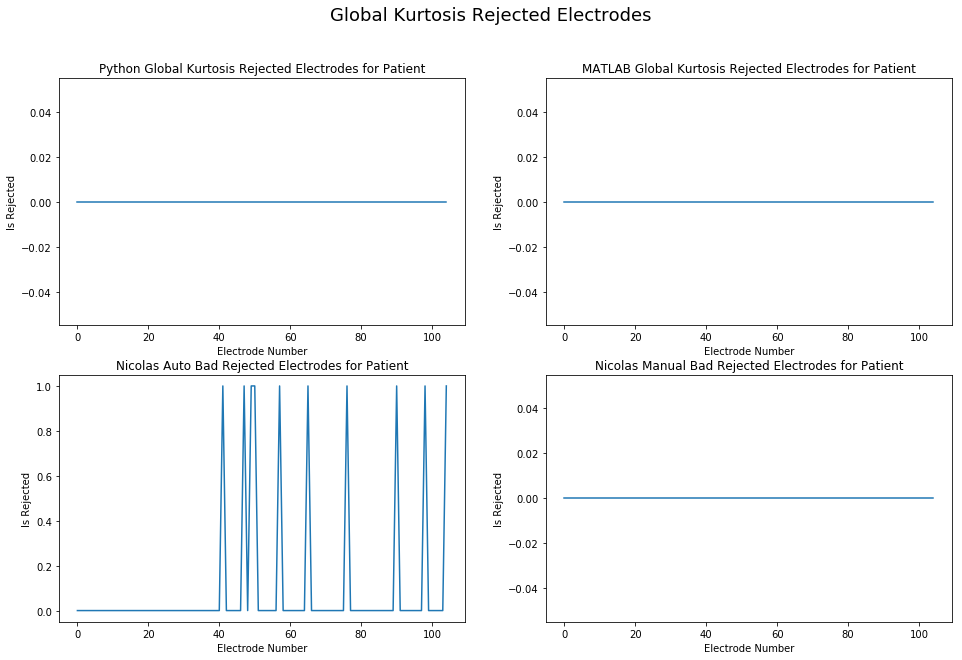

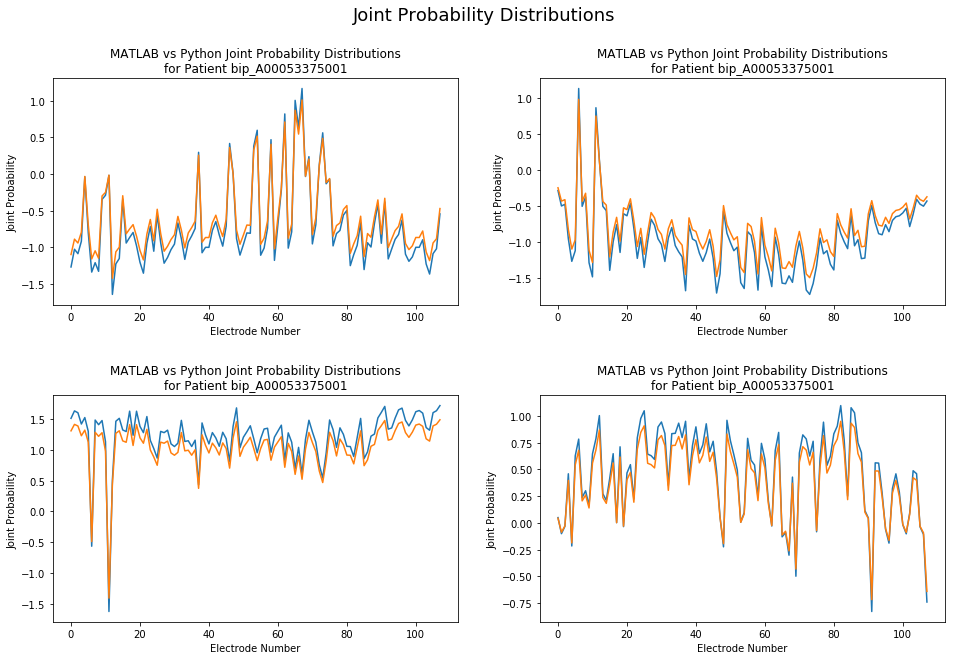

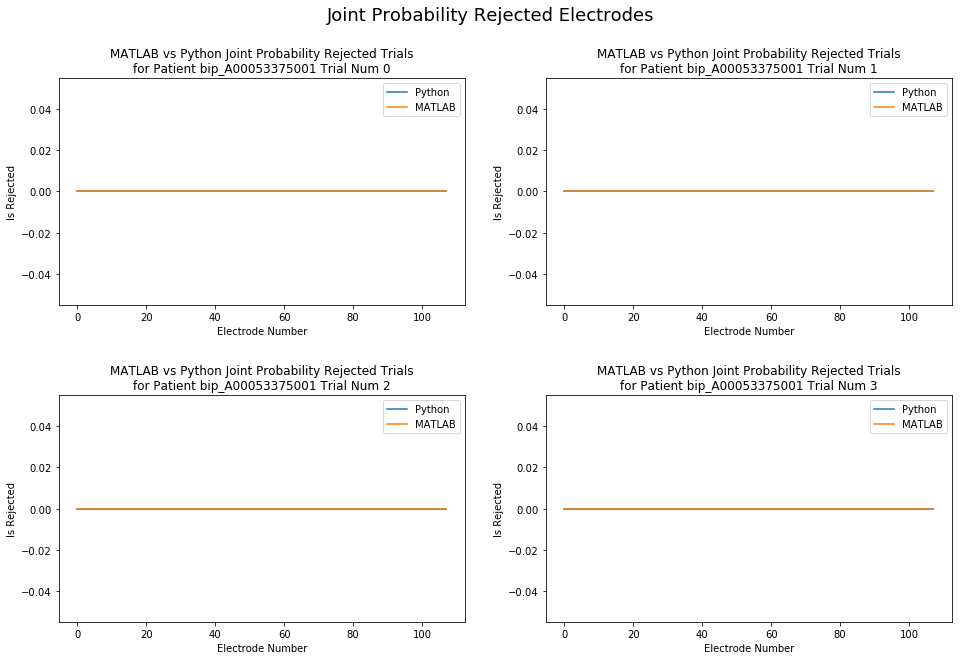

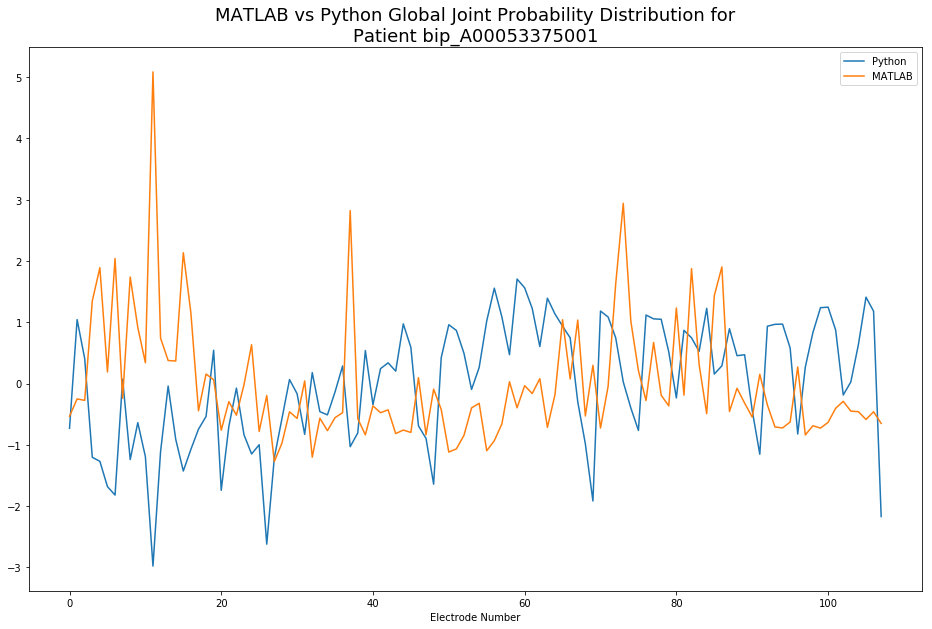

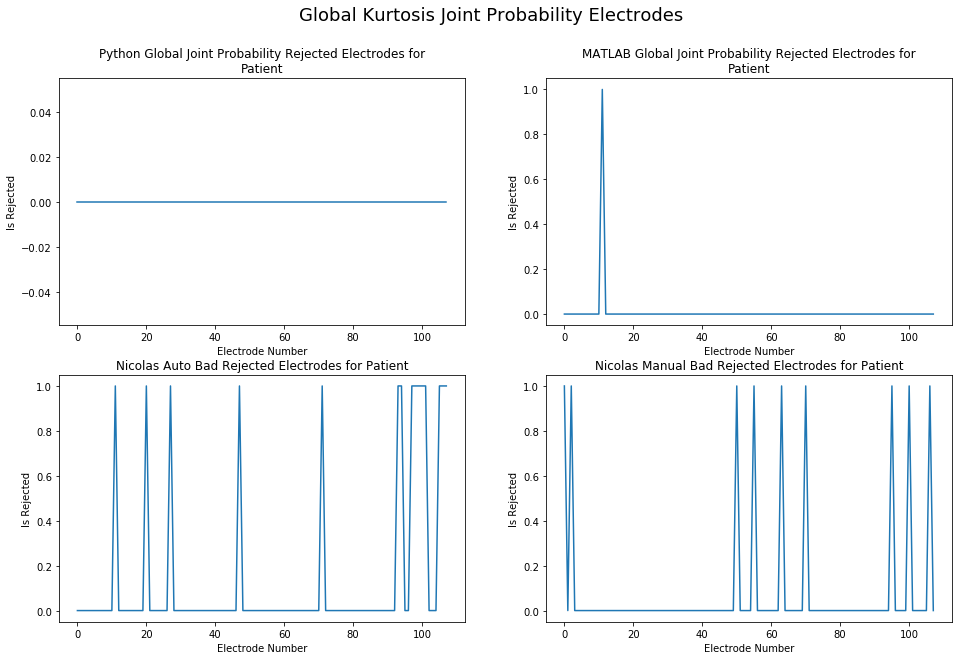

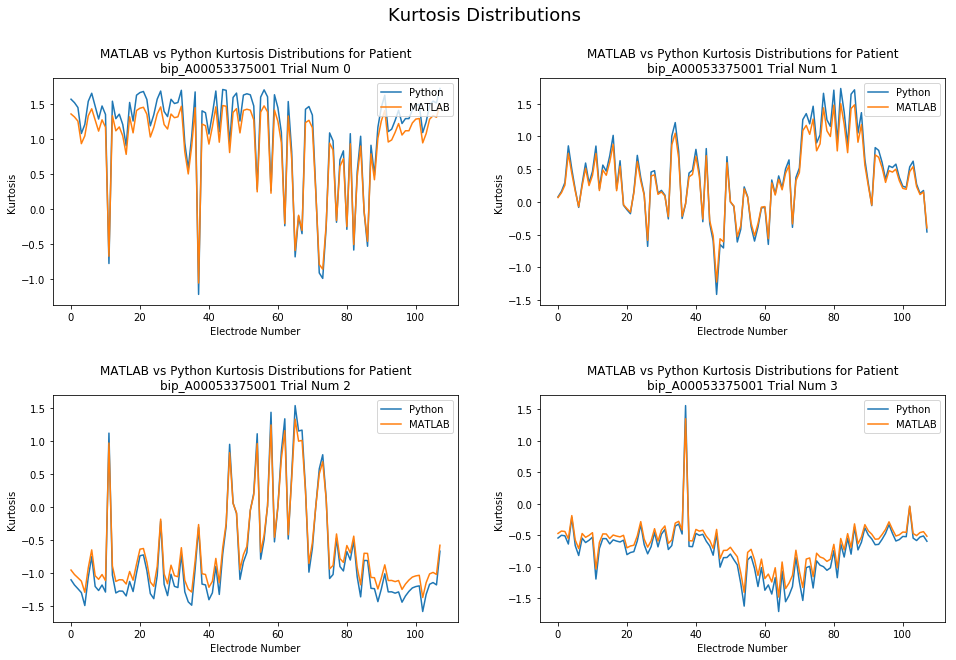

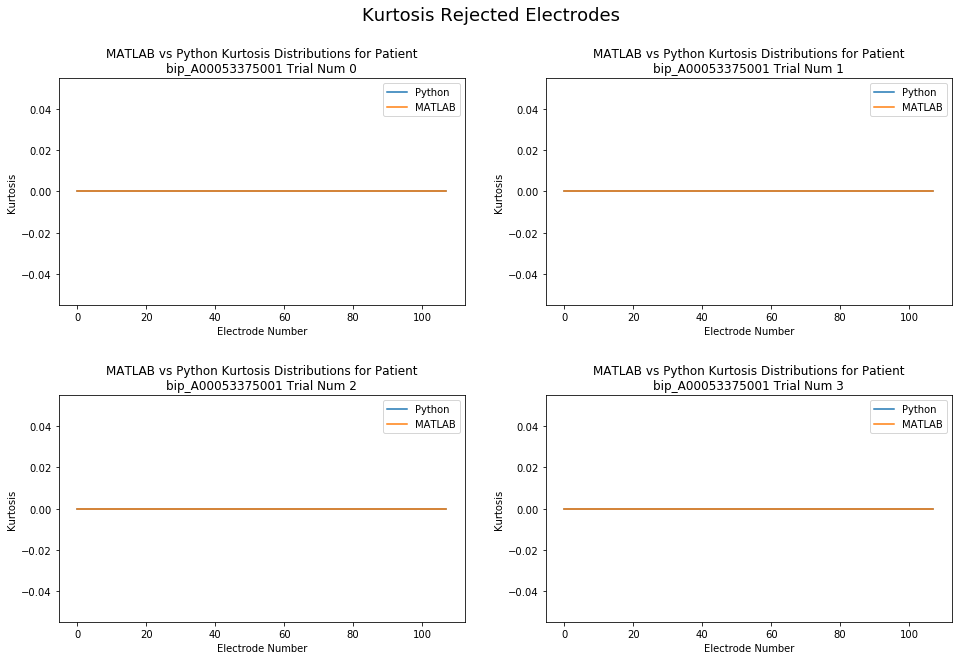

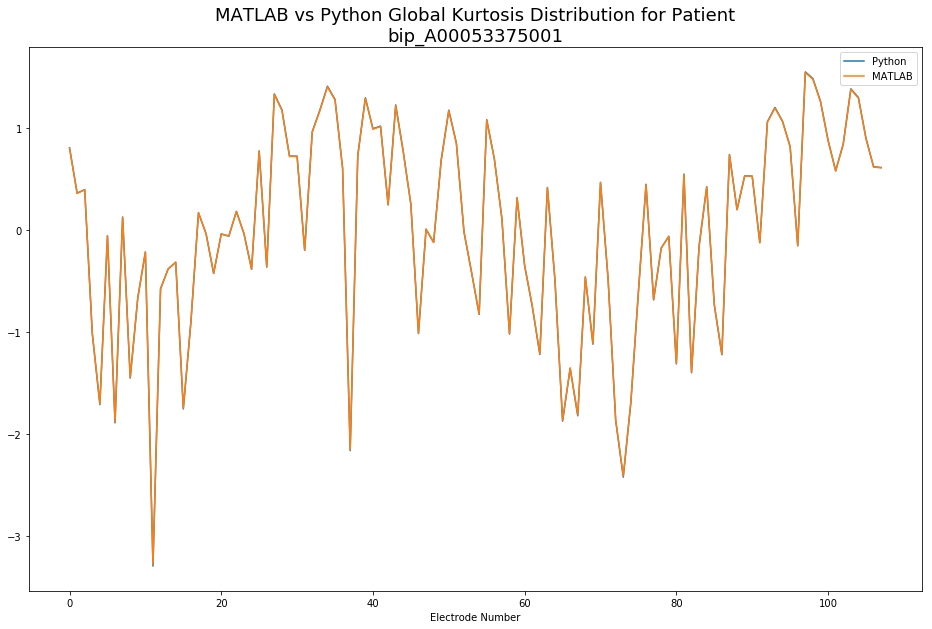

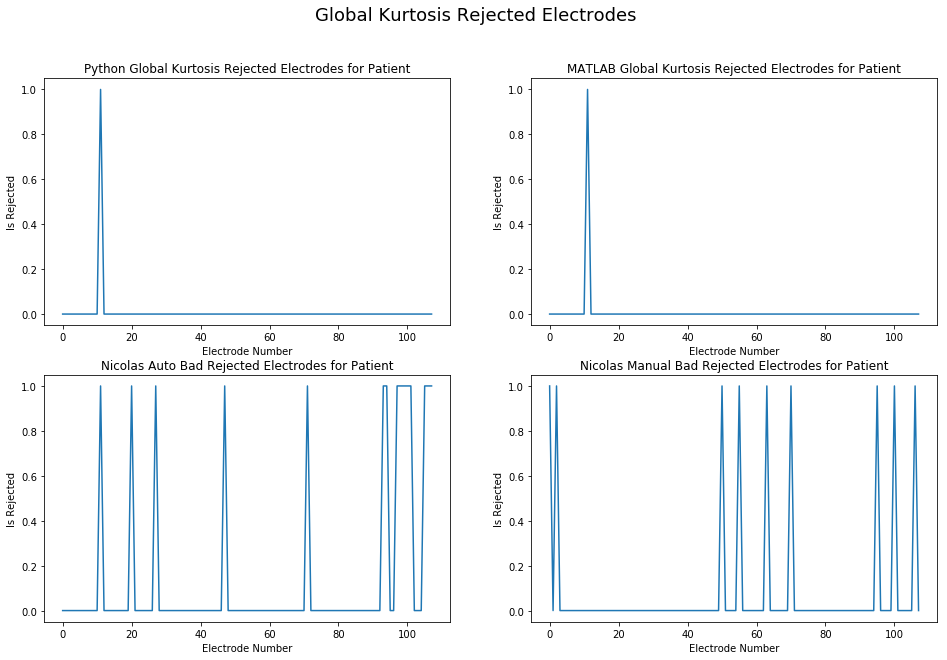

In [ ]:
for name in patient_names:
    plot_data(name)